In [1]:
import aequitas
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 500)
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Pre-Processing

In [2]:
test = pd.read_csv('../output_files/test.csv')
train = pd.read_csv('../output_files/train.csv')

In [3]:
train

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,low-flag,imputed,subbed,avg_household_size_owner,avg_household_size_renter,Total_Less_Than_HS,Total_HS_Grad,Total_Some_College_or_AAS,Total_Bachelors,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10
0,5,170310101001,2005,596.41,33.66,174.0,80.24,0,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.137489,0.936551,0.963262,1.545893,1.263759,1
1,6,170310101001,2006,596.41,33.66,169.0,80.24,0,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.191144,0.936551,0.963262,1.545893,1.263759,1
2,7,170310101001,2007,596.41,33.66,165.0,80.24,0,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.219648,0.936551,0.963262,1.545893,1.263759,1
3,8,170310101001,2008,596.41,33.66,160.0,80.24,0,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.179407,0.936551,0.963262,1.545893,1.263759,1
4,9,170310101001,2009,596.41,33.66,155.0,80.24,0,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.428945,2.017695,558.568213,574.498857,921.986034,753.718604,37.237881,1,0.0,0.155933,0.936551,0.963262,1.545893,1.263759,1
5,10,170310101001,2010,579.00,0.00,150.0,56.18,0,0,0,37.00,42.31,29.02,20.90,0.17,3.63,0.0,3.11,0.86,0,0,0,2.360052,1.960466,561.000000,577.000000,926.000000,757.000000,37.400000,7,0.0,0.176166,0.968912,0.996546,1.599309,1.307427,1
6,11,170310101001,2011,435.00,18.92,153.0,67.23,0,0,0,50.00,49.89,40.23,6.67,0.00,0.00,0.0,3.22,0.00,0,0,0,1.890000,1.570000,457.000000,720.000000,1051.000000,661.000000,37.700000,1,0.0,0.245977,1.050575,1.655172,2.416092,1.519540,1
7,12,170310101001,2012,435.00,18.92,156.0,67.23,0,0,0,50.00,49.89,40.23,6.67,0.00,0.00,0.0,3.22,0.00,0,0,0,1.890000,1.570000,399.000000,767.000000,1081.000000,598.000000,36.800000,1,0.0,0.252874,0.917241,1.763218,2.485057,1.374713,1
8,13,170310101001,2013,435.00,18.92,159.0,67.23,0,0,0,50.00,49.89,40.23,6.67,0.00,0.00,0.0,3.22,0.00,0,0,0,1.890000,1.570000,294.000000,718.000000,1068.000000,670.000000,37.300000,1,0.0,0.213793,0.675862,1.650575,2.455172,1.540230,1
9,22,170310101002,2005,2313.19,33.66,899.0,80.24,0,0,0,35.90,21.72,48.93,13.44,0.00,11.00,0.0,4.90,0.00,0,0,0,2.261083,3.791037,558.568213,574.498857,921.986034,753.718604,37.237881,7,0.0,0.258517,0.241471,0.248358,0.398578,0.325835,0


In [3]:
model = RandomForestClassifier(max_depth=10, min_samples_split=5, max_features='log2', n_estimators=1000, n_jobs=-1)

In [5]:
train.columns

Index(['Unnamed: 0', 'GEOID', 'Date', 'population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'low-flag',
       'imputed', 'subbed', 'avg_household_size_owner',
       'avg_household_size_renter', 'Total_Less_Than_HS', 'Total_HS_Grad',
       'Total_Some_College_or_AAS', 'Total_Bachelors', 'Mean_hours_worked',
       'Primary Type', 'redlined', 'crime_rate', 'less_hs_rate',
       'hs_grad_rate', 'some_college_rate', 'bachelors_rate', 'if_top_10'],
      dtype='object')

In [4]:
pred_vars = ['population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'low-flag',
       'imputed', 'subbed', 'avg_household_size_owner',
       'avg_household_size_renter', 'Total_Less_Than_HS', 'Total_HS_Grad',
       'Total_Some_College_or_AAS', 'Total_Bachelors', 'Mean_hours_worked',
       'Primary Type', 'redlined', 'crime_rate']
dep_var = 'if_top_10'

In [5]:
X_train = train[pred_vars]
y_train = train[dep_var]
X_test = test[pred_vars]
y_test = test[dep_var]

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
X_test['label'] = y_test
X_test['predicted'] = y_pred

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
data_interested = X_test[['median-gross-rent', 'median-household-income', 'median-property-value', 'pct-white', 'pct-af-am'
                         , 'pct-hispanic', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'avg_household_size_owner',
                        'avg_household_size_renter', 'redlined', 'label', 'predicted']]

In [10]:
data_interested

,median-gross-rent,median-household-income,median-property-value,pct-white,pct-af-am,pct-hispanic,pct-asian,pct-nh-pi,pct-multiple,pct-other,avg_household_size_owner,avg_household_size_renter,redlined,label,predicted
0,0,0,0,49.89,40.23,6.67,0.00,0.0,3.22,0.00,2.28,1.16,0.0,0,1
1,0,0,0,49.89,40.23,6.67,0.00,0.0,3.22,0.00,2.03,1.20,0.0,0,1
2,0,0,0,49.89,40.23,6.67,0.00,0.0,3.22,0.00,3.16,1.53,0.0,0,0
3,0,0,0,26.60,55.08,14.30,0.94,0.0,3.07,0.00,2.14,2.11,0.0,0,0
4,0,0,0,26.60,55.08,14.30,0.94,0.0,3.07,0.00,2.24,1.92,0.0,0,0
5,0,0,0,26.60,55.08,14.30,0.94,0.0,3.07,0.00,3.82,1.99,0.0,0,0
6,1,0,0,55.86,23.91,10.67,6.48,0.0,2.44,0.64,1.89,1.88,0.0,1,0
7,1,0,0,55.86,23.91,10.67,6.48,0.0,2.44,0.64,1.72,1.79,0.0,1,0
8,1,0,0,55.86,23.91,10.67,6.48,0.0,2.44,0.64,1.45,1.84,0.0,1,0
9,1,0,0,22.13,36.25,37.82,2.52,0.0,1.29,0.00,2.14,3.12,0.0,1,0


In [11]:
def return_majority_race(row):
    
    max_ = 0
    race = 'whatever'
    race_list = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
    race_dic = {'pct-white': 'White', 'pct-af-am': 'African American', 'pct-asian': 'Asian', 'pct-nh-pi': 'Native Hawaiian and Pacific Islander',
               'pct-multiple': 'Multiple Race', 'pct-other': 'Other', 'pct-hispanic': 'Hispanic'}
    for race_ in race_list:
        if row[race_] > max_:
            max_ = row[race_]
            race = race_
    if race == 'whatever':
        return 'No Majority Race Reported'
    else:
        return race_dic[race]

In [12]:
row = data_interested.iloc[707]
row

median-gross-rent            0.00
median-household-income      0.00
median-property-value        0.00
pct-white                    0.00
pct-af-am                    0.00
pct-hispanic                 0.00
pct-asian                    0.00
pct-nh-pi                    0.00
pct-multiple                 0.00
pct-other                    0.00
avg_household_size_owner     1.62
avg_household_size_renter    1.69
redlined                     0.00
label                        1.00
predicted                    0.00
Name: 707, dtype: float64

In [13]:
return_majority_race(row)

'No Majority Race Reported'

In [14]:
data_interested['majority_race'] = data_interested.apply(lambda row: return_majority_race(row), axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df = data_interested[['label', 'predicted',
       'majority_race']]

In [16]:
df.shape

(6582, 3)

## Auditing

By predicted value
<br>
In the bar charts below, we see a difference in how the predicted outcomes are distributed by race, with many blocks whose majority race are white and Hispanic people predicted as 0 (Will not be top 10% in eviction rate in the next three years) and a considerable number of blocks whose majority race is African American predicted as 1 (Will be top 10% in eviction rate in the next three years).

In [17]:
aqp = Plot()

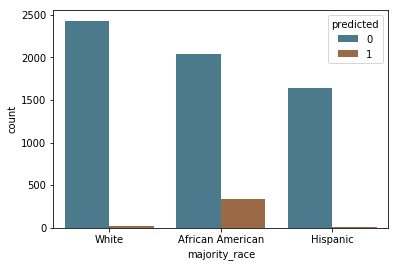

In [18]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_race = sns.countplot(x="majority_race", hue="predicted", data=df[df.majority_race.isin(['African American', 'White', 'Hispanic'])], palette=aq_palette)

By label value

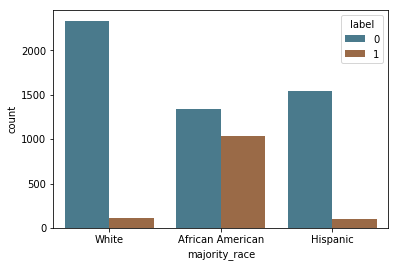

In [19]:
by_race = sns.countplot(x="majority_race", hue="label", data=df[df.majority_race.isin(['African American', 'White', 'Hispanic'])], palette=aq_palette)

It is observed that the distribution in 'predicted' and 'label' are quite consistent. No significant bias on certain groups

Put Aequitas Into work

In [20]:
df = df.rename({'predicted':"score", "label":"label_value"}, axis = 1)

In [21]:
for col in df.columns[2:]:
    df[col] = df[col].astype('str')

In [22]:
g = Group()
xtab, _ = g.get_crosstabs(df)

model_id, score_thresholds 1 {'rank_abs': [364]}


View calculated counts across sample population groups

In [23]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,364,majority_race,African American,335,2044,90,790,1254,245,1035,1344,2379,6582
1,1,binary 0/1,364,majority_race,Asian,0,87,0,0,87,0,0,87,87,6582
2,1,binary 0/1,364,majority_race,Hispanic,5,1636,1,92,1544,4,96,1545,1641,6582
3,1,binary 0/1,364,majority_race,Multiple Race,3,3,0,0,3,3,3,3,6,6582
4,1,binary 0/1,364,majority_race,No Majority Race Reported,4,20,0,5,15,4,9,15,24,6582
5,1,binary 0/1,364,majority_race,White,17,2428,8,102,2326,9,111,2334,2445,6582


View calculated absolute metrics for each sample population group

In [24]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,majority_race,African American,0.24,0.93,0.39,0.27,0.07,0.76,0.61,0.73,0.92,0.14,0.44
1,majority_race,Asian,NaN,1.00,0.00,NaN,0.00,NaN,1.00,NaN,0.00,0.00,0.00
2,majority_race,Hispanic,0.04,1.00,0.06,0.20,0.00,0.96,0.94,0.80,0.01,0.00,0.06
3,majority_race,Multiple Race,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.01,0.50,0.50
4,majority_race,No Majority Race Reported,0.44,1.00,0.25,0.00,0.00,0.56,0.75,1.00,0.01,0.17,0.38
5,majority_race,White,0.08,1.00,0.04,0.47,0.00,0.92,0.96,0.53,0.05,0.01,0.05


we see that blocks whose majority residents are African-Americans have a false positive rate (fpr) of 7%, while those whose majority residents are Whites have a false positive rate of 0. This means that African-American block groups are slightly more likely to be falsely labeled as high-risk than White block groups. 